In [6]:
import os
import requests
import pandas as pd
import numpy as np 
import seaborn as sns 
!pip install hvplot
import hvplot.pandas
import matplotlib.pyplot as plt
!pip install yfinance
!pip install YahooFinancials
#!pip install fdpf
!pip install MCSimulation
from MCForecastTools import MCSimulation
import yfinance as yf
%matplotlib inline
#streamlit or tableau of 


ERROR: Could not find a version that satisfies the requirement MCSimulation (from versions: none)
ERROR: No matching distribution found for MCSimulation


In [7]:
import yfinance as yf
from yahoofinancials import YahooFinancials


In [8]:
def read_data(data, start, end):
    data1_df = yf.download(data, start, end)
    data1_df.dropna(inplace = True)
    dataclose1_df = data1_df
    return dataclose1_df

In [9]:
#import fpdf as fp 
#from fpdf import FPDF

In [10]:
defport1 = read_data(['GROW.AX', 'QPON.AX', 'ILB.AX', 'MVA.AX', 'GOLD.AX', 'AAA.AX'],"2019-04-01","2022-07-25")
shareport1 = read_data(['360.AX', 'ANZ.AX', 'CBA.AX', 'ALD.AX', 'AMC.AX', 'BHP.AX', 'APA.AX', 'BXB.AX', 'CHC.AX', 'COL.AX', 'WES.AX', 'CSL.AX', 'RMD.AX', 'TLS.AX', 'IAG.AX', 'VCX.AX', 'ANN.AX', 'JLG.AX','XRO.AX'],"2010-04-01","2022-07-25")
growport1 = read_data(['VHY.AX', 'EX20.AX', 'QUAL.AX',  'MICH.AX', 'MHG.AX', 'FEMX.AX', 'ACDC.AX', 'DJRE.AX'],"2019-04-01","2022-07-25")
# 'MCSG.XA','MCSI.XA', include these 'XRO' 

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  19 of 19 completed
[*********************100%***********************]  8 of 8 completed


In [11]:
portfolio1_df = pd.concat([defport1, shareport1, growport1], axis = "columns", join = "inner")
portfolio1_df.dropna(inplace = True)
portfolio1_df.head()

Adj Close                                                        \
               AAA.AX     GOLD.AX GROW.AX      ILB.AX     MVA.AX    QPON.AX   
Date                                                                          
2019-05-10  50.090000  173.250000    3.69  123.769997  23.670000  25.680000   
2019-05-13  50.099998  173.279999    3.67  123.550003  23.959999  25.680000   
2019-05-14  50.099998  175.740005    3.68  124.190002  23.920000  25.690001   
2019-05-15  50.099998  176.009995    3.67  123.980003  23.879999  25.680000   
2019-05-16  50.115002  176.410004    3.67  124.760002  24.110001  25.660000   

                Close                                  ...       Open  \
               AAA.AX     GOLD.AX GROW.AX      ILB.AX  ...    QUAL.AX   
Date                                                   ...              
2019-05-10  50.090000  173.250000    3.69  123.769997  ...  26.620001   
2019-05-13  50.099998  173.279999    3.67  123.550003  ...  26.480000   
2019-05-14  50.099998  175.740005    3.68  124.190002  ...  26.090000   
2019-05-15  50.099998  176.009995    3.67  123.980003  ...  26.450001   
2019-05-16  50.115002  176.410004    3.67  124.760002  ...  26.639999   

                       Volume                                                 \
               VHY.AX ACDC.AX DJRE.AX EX20.AX FEMX.AX MHG.AX MICH.AX QUAL.AX   
Date                                                                           
2019-05-10  58.549999     143   26651   16203   16305  11773  201063   42834   
2019-05-13  58.840000    1491   14391    2372   16495   6331  317454   21644   
2019-05-14  58.389999     121   17043    6715   33945  17510  166030   59189   
2019-05-15  58.610001       0   28897   11015   10394  64518  282788   31777   
2019-05-16  58.849998    2145   15676       0    6644     10  158569   21596   

                   
           VHY.AX  
Date               
2019-05-10  18928  
2019-05-13  19924  
2019-05-14  33388  
2019-05-15  16941  
2019-05-16  25115  

[5 rows x 198 columns]

In [12]:
def read_data(data, start, end):
    data_df = yf.download(data, start, end)
    data_df.dropna(inplace = True)
    dataclose_df = data_df["Adj Close"]
    return dataclose_df

In [13]:
defport = read_data(['GROW.AX', 'DHOF.AX', 'QPON.AX', 'ILB.AX', 'MVA.AX', 'GOLD.AX', 'AAA.AX'],"2019-04-01","2022-07-25")
shareport = read_data(['360.AX', 'ANZ.AX', 'SQ2.AX', 'CBA.AX', 'PXA.AX', 'ALD.AX', 'AMC.AX', 'BHP.AX', 'APA.AX', 'BXB.AX', 'CHC.AX', 'COL.AX', 'WES.AX', 'CSL.AX', 'RMD.AX', 'TLS.AX', 'IAG.AX', 'VCX.AX', 'ANN.AX', 'JLG.AX','XRO.AX'],"2010-04-01","2022-07-25")
growport = read_data(['VHY.AX', 'EX20.AX', 'QUAL.AX',  'MICH.AX', 'MHG.AX', 'FEMX.AX', 'ACDC.AX', 'CLDD.AX', 'DJRE.AX'],"2019-04-01","2022-07-25")
indexport = read_data(['^AXJO','JABAX'],"2019-04-01", "2022-07-25")
# 'MCSG.XA','MCSI.XA', include these 'XRO' 

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  21 of 21 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  2 of 2 completed


In [14]:
close_df = pd.concat([defport, shareport, growport, indexport], axis = "columns", join = "inner")
close_df.dropna(inplace = True)
close_df.tail()

,AAA.AX,DHOF.AX,GOLD.AX,GROW.AX,ILB.AX,MVA.AX,QPON.AX,360.AX,ALD.AX,AMC.AX,...,CLDD.AX,DJRE.AX,EX20.AX,FEMX.AX,MHG.AX,MICH.AX,QUAL.AX,VHY.AX,JABAX,^AXJO
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-18,50.099998,9.34,23.480000,3.48,117.800003,20.959999,25.500000,3.81,32.360001,18.360001,...,9.39,20.129999,18.150000,5.74,3.10,2.94,36.400002,61.340000,38.189999,6687.100098
2022-07-19,50.099998,9.34,23.200001,3.47,117.480003,20.930000,25.540001,3.91,32.150002,18.000000,...,9.24,19.980000,18.000000,5.64,3.08,2.94,35.709999,61.650002,38.770000,6649.600098
2022-07-20,50.110001,9.34,22.980000,3.48,117.489998,21.400000,25.549999,4.24,32.900002,18.120001,...,9.46,20.270000,18.400000,5.67,3.14,2.94,36.770000,62.650002,38.919998,6759.200195
2022-07-21,50.099998,9.34,22.760000,3.48,117.489998,21.150000,25.559999,4.29,32.970001,17.969999,...,9.87,20.240000,18.520000,5.68,3.17,2.93,36.590000,62.480000,39.279999,6794.299805
2022-07-22,50.099998,9.33,23.110001,3.48,118.080002,21.330000,25.540001,4.20,32.570000,18.110001,...,10.03,20.299999,18.540001,5.67,3.17,2.92,36.700001,62.450001,39.169998,6791.500000


In [15]:
closeindex_df = (indexport)
closeindex_df.dropna(inplace = True)
closeindex_df.head()

,JABAX,^AXJO
Date,,
2019-04-01,30.569984,6217.000000
2019-04-02,30.579075,6242.399902
2019-04-03,30.588156,6285.000000
2019-04-04,30.660856,6232.799805
2019-04-05,30.724474,6181.299805


In [16]:
#quote_table = yf.get_quote_table([defport, shareport, growport])
#quote_table

#si.get_stats_valuation([defport, shareport, growport])

In [17]:
datareturns_df = close_df.pct_change().copy()
datareturns_df.head(10)

,AAA.AX,DHOF.AX,GOLD.AX,GROW.AX,ILB.AX,MVA.AX,QPON.AX,360.AX,ALD.AX,AMC.AX,...,CLDD.AX,DJRE.AX,EX20.AX,FEMX.AX,MHG.AX,MICH.AX,QUAL.AX,VHY.AX,JABAX,^AXJO
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21,0.0000,-0.001296,0.006419,-0.005277,0.003051,-0.017558,0.000387,-0.049238,-0.023415,-0.021574,...,-0.021970,-0.006658,-0.023245,0.000000,-0.013298,0.006757,-0.018116,-0.022491,-0.009432,-0.022690
2022-01-24,0.0000,-0.002202,0.000713,-0.007958,-0.001141,0.012053,0.000387,-0.088779,-0.007659,0.003576,...,-0.013943,0.005865,-0.005949,-0.005650,-0.008086,0.000000,-0.000984,-0.007875,0.001626,-0.005059
2022-01-25,0.0000,0.001834,0.008554,0.000000,0.001446,-0.037372,-0.001934,0.031123,-0.026510,-0.013658,...,-0.002357,-0.011662,-0.031421,-0.009943,-0.010870,-0.023490,-0.012066,-0.024903,-0.010434,-0.024918
2022-01-27,0.0002,-0.002012,-0.007192,-0.002674,-0.009807,-0.026024,0.001937,-0.068241,0.003447,-0.016255,...,-0.040945,-0.007164,-0.024202,-0.024390,-0.032967,-0.003436,-0.014207,-0.006385,-0.002812,-0.017711
2022-01-28,-0.0002,0.000000,-0.001591,-0.002681,0.009367,0.022339,0.000000,0.076056,-0.005496,0.028764,...,0.017241,0.008913,0.018470,0.014706,0.019886,0.017241,0.021997,0.023775,0.017387,0.021906
2022-01-31,0.0002,0.000000,-0.003733,0.013441,0.006770,0.013710,-0.000773,0.073298,0.026943,0.000595,...,0.035512,0.024821,0.011399,0.010145,0.013928,0.010169,0.023998,-0.007532,0.011778,-0.002361
2022-02-01,-0.0002,-0.006048,-0.001726,0.000000,0.001058,0.005072,-0.001161,0.042683,0.010763,0.008323,...,0.040530,0.000411,0.012295,0.014347,0.024725,-0.003356,0.007973,0.004427,0.004793,0.004934
2022-02-02,-0.0002,0.000000,-0.009995,0.002653,-0.000755,0.005467,0.000387,0.011696,0.014975,-0.035377,...,0.013483,-0.010669,0.007085,0.001414,0.000000,0.006734,0.011026,0.014009,0.009087,0.011661


In [18]:
dailyreturn_std = datareturns_df.std() 
dailyreturn_std

AAA.AX     0.000174
DHOF.AX    0.003036
GOLD.AX    0.082179
GROW.AX    0.005030
ILB.AX     0.006380
MVA.AX     0.014023
QPON.AX    0.001007
360.AX     0.072521
ALD.AX     0.017605
AMC.AX     0.014273
ANN.AX     0.021463
ANZ.AX     0.014199
APA.AX     0.015112
BHP.AX     0.023530
BXB.AX     0.019519
CBA.AX     0.014273
CHC.AX     0.021563
COL.AX     0.012795
CSL.AX     0.016580
IAG.AX     0.015308
JLG.AX     0.031452
PXA.AX     0.025481
RMD.AX     0.018915
SQ2.AX     0.065513
TLS.AX     0.011415
VCX.AX     0.020285
WES.AX     0.016962
XRO.AX     0.034136
ACDC.AX    0.016073
CLDD.AX    0.027389
DJRE.AX    0.011626
EX20.AX    0.011654
FEMX.AX    0.013950
MHG.AX     0.013932
MICH.AX    0.009808
QUAL.AX    0.013749
VHY.AX     0.010434
JABAX      0.010654
^AXJO      0.010441
dtype: float64

In [19]:
#get daily returns on defensive portfolio 
defreturns_df = defport.pct_change().copy() 
defreturns_df.tail()

,AAA.AX,DHOF.AX,GOLD.AX,GROW.AX,ILB.AX,MVA.AX,QPON.AX
Date,,,,,,,
2022-07-18,0.0000,0.000000,-0.004663,0.002882,0.002383,0.008662,-0.000784
2022-07-19,0.0000,0.000000,-0.011925,-0.002874,-0.002716,-0.001431,0.001569
2022-07-20,0.0002,0.000000,-0.009483,0.002882,0.000085,0.022456,0.000391
2022-07-21,-0.0002,0.000000,-0.009574,0.000000,0.000000,-0.011682,0.000391
2022-07-22,0.0000,-0.001071,0.015378,0.000000,0.005022,0.008511,-0.000782


In [20]:
defport_std = defreturns_df.std() 
defport_std

AAA.AX     0.000166
DHOF.AX    0.002904
GOLD.AX    0.078455
GROW.AX    0.005089
ILB.AX     0.006194
MVA.AX     0.013786
QPON.AX    0.000991
dtype: float64

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualdef_std = defport_std * np.sqrt(252)
annualdef_std

AAA.AX     0.002628
DHOF.AX    0.046107
GOLD.AX    1.245432
GROW.AX    0.080789
ILB.AX     0.098330
MVA.AX     0.218852
QPON.AX    0.015737
dtype: float64

In [22]:
#look at correlations for defensive holdings first 
defportcorr = defreturns_df.corr()
defportcorr

,AAA.AX,DHOF.AX,GOLD.AX,GROW.AX,ILB.AX,MVA.AX,QPON.AX
AAA.AX,1.000000,-0.017215,-0.096846,0.090181,0.086106,0.114707,-0.013655
DHOF.AX,-0.017215,1.000000,0.025178,-0.021673,-0.005880,-0.066708,0.056477
GOLD.AX,-0.096846,0.025178,1.000000,-0.022151,-0.054431,0.015588,-0.130181
GROW.AX,0.090181,-0.021673,-0.022151,1.000000,0.206355,0.296261,0.157532
ILB.AX,0.086106,-0.005880,-0.054431,0.206355,1.000000,0.312362,0.128030
MVA.AX,0.114707,-0.066708,0.015588,0.296261,0.312362,1.000000,0.064201
QPON.AX,-0.013655,0.056477,-0.130181,0.157532,0.128030,0.064201,1.000000


<AxesSubplot:>

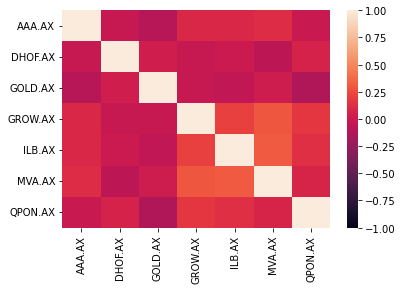

In [23]:
sns.heatmap(defportcorr, vmin=-1, vmax=1)

In [24]:
# Calculate sharpe ratios of defensive portfolio
sharpe_ratios = (datareturns_df.mean() * 252) / (dailyreturn_std * np.sqrt(252))
sharpe_ratios
#consider adding sortino ratios below this 

AAA.AX     0.450389
DHOF.AX   -2.761207
GOLD.AX   -1.453374
GROW.AX   -2.167118
ILB.AX    -2.081944
MVA.AX    -1.170324
QPON.AX   -1.501204
360.AX    -0.677259
ALD.AX     0.663463
AMC.AX     0.785196
ANN.AX    -1.225892
ANZ.AX    -1.793507
APA.AX     1.864049
BHP.AX    -1.044449
BXB.AX     1.048517
CBA.AX     0.198864
CHC.AX    -2.190505
COL.AX     1.764791
CSL.AX     0.790411
IAG.AX    -0.165829
JLG.AX    -0.204814
PXA.AX    -1.395366
RMD.AX     0.211566
SQ2.AX    -0.478965
TLS.AX    -0.386443
VCX.AX     1.475304
WES.AX    -0.762159
XRO.AX    -0.689933
ACDC.AX   -1.569515
CLDD.AX   -1.087002
DJRE.AX   -1.794395
EX20.AX   -1.110732
FEMX.AX   -1.959881
MHG.AX    -1.482690
MICH.AX   -0.102819
QUAL.AX   -1.031324
VHY.AX    -0.653842
JABAX     -1.166329
^AXJO     -0.889081
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

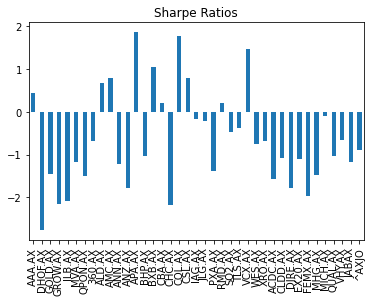

In [25]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [26]:
d = shareport#(start='4/1/2019', end='6/10/2022')
df = shareport(d, columns=['Date'])
df['returns'] = np.random.rand(d.size, 1)
df = df.set_index('Date')

df['rolling_SR'] = df.returns.rolling(180).apply(lambda x: (x.mean() - 0.005) / x.std(), raw = True)
df.fillna(0, inplace = True)
df[df['rolling_SR'] > 0].rolling_SR.plot(style='-', lw=3, color='orange', 
                                         label='Sharpe', figsize = (10,7))\
                                         .axhline(y = 1.6, color = "blue", lw = 3,
                                                 linestyle = '--')

plt.ylabel('Sharpe ratio')
plt.legend(loc='best')
plt.title('Rolling Sharpe ratio (6-month)')
plt.show()


TypeError: 'DataFrame' object is not callable

In [27]:
sharereturns_df = shareport.pct_change().copy() 
sharereturns_df.head()

,360.AX,ALD.AX,AMC.AX,ANN.AX,ANZ.AX,APA.AX,BHP.AX,BXB.AX,CBA.AX,CHC.AX,...,CSL.AX,IAG.AX,JLG.AX,PXA.AX,RMD.AX,SQ2.AX,TLS.AX,VCX.AX,WES.AX,XRO.AX
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21,-0.049238,-0.023415,-0.021574,-0.018447,-0.016445,-0.024316,-0.048115,-0.012770,-0.012575,-0.006257,...,-0.024811,-0.011338,0.000000,-0.025091,-0.017086,-0.023382,-0.014458,-0.023952,-0.022652,-0.000767
2022-01-24,-0.088779,-0.007659,0.003576,0.003334,-0.012095,-0.006231,-0.002188,-0.000995,0.000719,0.012021,...,-0.007372,0.004587,-0.015476,0.006971,-0.001830,-0.036232,-0.009780,0.024540,-0.001319,-0.009036
2022-01-25,0.031123,-0.026510,-0.013658,-0.028701,-0.036010,-0.013584,-0.012500,-0.025896,-0.020423,-0.062217,...,-0.016072,-0.025114,-0.032648,-0.020234,-0.002139,-0.042105,-0.029630,-0.035928,-0.008491,-0.034925
2022-01-27,-0.068241,0.003447,-0.016255,-0.028927,0.011207,0.016949,0.014213,-0.015337,-0.017496,-0.025332,...,-0.034527,0.000000,-0.062500,-0.024456,-0.038579,-0.053501,-0.012723,-0.015528,-0.036917,-0.066851


In [28]:
shareport_std = sharereturns_df.std() 
shareport_std

360.AX    0.070543
ALD.AX    0.017399
AMC.AX    0.014084
ANN.AX    0.021057
ANZ.AX    0.013890
APA.AX    0.014712
BHP.AX    0.023540
BXB.AX    0.019207
CBA.AX    0.014041
CHC.AX    0.021414
COL.AX    0.012309
CSL.AX    0.016434
IAG.AX    0.014886
JLG.AX    0.031082
PXA.AX    0.025104
RMD.AX    0.018490
SQ2.AX    0.064320
TLS.AX    0.011382
VCX.AX    0.019686
WES.AX    0.016498
XRO.AX    0.033754
dtype: float64

In [29]:
# Calculate the annualized standard deviation (252 trading days)
annualshare_std = shareport_std * np.sqrt(252)
annualshare_std

360.AX    1.119841
ALD.AX    0.276194
AMC.AX    0.223580
ANN.AX    0.334263
ANZ.AX    0.220492
APA.AX    0.233546
BHP.AX    0.373692
BXB.AX    0.304903
CBA.AX    0.222887
CHC.AX    0.339937
COL.AX    0.195405
CSL.AX    0.260875
IAG.AX    0.236310
JLG.AX    0.493404
PXA.AX    0.398507
RMD.AX    0.293523
SQ2.AX    1.021049
TLS.AX    0.180680
VCX.AX    0.312506
WES.AX    0.261894
XRO.AX    0.535836
dtype: float64

In [30]:
shareportcorr = sharereturns_df.corr() 
shareportcorr

,360.AX,ALD.AX,AMC.AX,ANN.AX,ANZ.AX,APA.AX,BHP.AX,BXB.AX,CBA.AX,CHC.AX,...,CSL.AX,IAG.AX,JLG.AX,PXA.AX,RMD.AX,SQ2.AX,TLS.AX,VCX.AX,WES.AX,XRO.AX
360.AX,1.000000,0.039532,0.086919,0.258272,0.251316,0.074272,0.055283,0.231551,0.253656,0.420417,...,0.355142,0.139920,0.312020,0.424369,0.363102,0.667210,0.299614,0.327656,0.441891,0.645265
ALD.AX,0.039532,1.000000,0.234343,0.078936,0.269090,0.074643,0.376394,0.034982,0.259194,0.122375,...,0.106221,0.147273,0.190153,0.211982,0.122097,0.147883,0.184237,0.113180,0.105486,0.087963
AMC.AX,0.086919,0.234343,1.000000,0.264135,0.359547,0.248295,0.082057,0.229457,0.340957,0.351485,...,0.346275,0.270330,0.061755,0.305770,0.332151,0.158700,0.329695,0.297956,0.387680,0.259011
ANN.AX,0.258272,0.078936,0.264135,1.000000,0.421875,0.191543,0.155396,0.263525,0.400347,0.283748,...,0.296760,0.206390,0.190653,0.224590,0.203393,0.202858,0.252552,0.243766,0.274808,0.303510
ANZ.AX,0.251316,0.269090,0.359547,0.421875,1.000000,0.145124,0.201047,0.242789,0.709157,0.334985,...,0.275662,0.381709,0.164135,0.191430,0.140407,0.230444,0.359339,0.364851,0.445223,0.231188
APA.AX,0.074272,0.074643,0.248295,0.191543,0.145124,1.000000,0.084949,0.191290,0.101244,0.229639,...,0.263936,0.070618,0.087668,0.081454,0.192416,0.018340,0.240036,0.280284,0.154646,0.152832
BHP.AX,0.055283,0.376394,0.082057,0.155396,0.201047,0.084949,1.000000,0.188539,0.059731,0.076061,...,-0.037910,0.056345,0.251509,0.056641,0.060113,0.114688,0.149507,0.107867,0.060878,0.056883
BXB.AX,0.231551,0.034982,0.229457,0.263525,0.242789,0.191290,0.188539,1.000000,0.235724,0.290597,...,0.257366,0.229223,0.184819,0.181871,0.226570,0.194820,0.283525,0.236370,0.252157,0.325667
CBA.AX,0.253656,0.259194,0.340957,0.400347,0.709157,0.101244,0.059731,0.235724,1.000000,0.380476,...,0.286440,0.229135,0.209843,0.261175,0.164605,0.256228,0.402788,0.335456,0.497628,0.340886
CHC.AX,0.420417,0.122375,0.351485,0.283748,0.334985,0.229639,0.076061,0.290597,0.380476,1.000000,...,0.501916,0.062031,0.372705,0.461753,0.399821,0.498106,0.334302,0.591126,0.422953,0.534551


<AxesSubplot:>

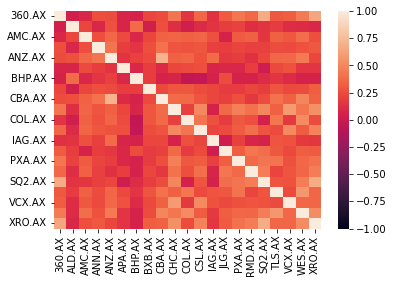

In [31]:
sns.heatmap(shareportcorr, vmin=-1, vmax=1) #line_plot.get_figure().savefig("MC_summitbal_sim_plot.png", bbox_inches="tight")

In [32]:
growreturns_df = growport.pct_change().copy() 
growreturns_df.head() 

,ACDC.AX,CLDD.AX,DJRE.AX,EX20.AX,FEMX.AX,MHG.AX,MICH.AX,QUAL.AX,VHY.AX
Date,,,,,,,,,
2021-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-23,-0.008809,-0.013063,0.010011,0.000530,-0.017647,-0.008265,-0.007463,-0.009575,0.009839
2021-02-24,-0.023175,0.002320,0.007303,-0.006359,-0.007485,0.000000,0.018797,-0.007553,-0.007187
2021-02-25,0.009098,0.000353,0.006214,0.009067,0.001508,0.011111,-0.007380,0.003653,0.013353
2021-02-26,-0.021913,-0.030154,-0.004117,-0.022199,-0.007530,-0.024725,-0.003717,-0.010616,-0.023655


In [33]:
growport_std = growreturns_df.std() 
growport_std

ACDC.AX    0.012522
CLDD.AX    0.020019
DJRE.AX    0.009152
EX20.AX    0.009366
FEMX.AX    0.010434
MHG.AX     0.010081
MICH.AX    0.007933
QUAL.AX    0.010233
VHY.AX     0.009005
dtype: float64

In [34]:
# Calculate the annualized standard deviation (252 trading days)
annualgrow_std = growport_std * np.sqrt(252)
annualgrow_std

ACDC.AX    0.198788
CLDD.AX    0.317791
DJRE.AX    0.145283
EX20.AX    0.148680
FEMX.AX    0.165636
MHG.AX     0.160033
MICH.AX    0.125928
QUAL.AX    0.162442
VHY.AX     0.142943
dtype: float64

In [35]:
growcorrelation = growreturns_df.corr() 
growcorrelation

,ACDC.AX,CLDD.AX,DJRE.AX,EX20.AX,FEMX.AX,MHG.AX,MICH.AX,QUAL.AX,VHY.AX
ACDC.AX,1.000000,0.487215,0.404080,0.645268,0.594226,0.516276,0.242512,0.606957,0.555565
CLDD.AX,0.487215,1.000000,0.394336,0.559123,0.517772,0.631352,0.222207,0.723688,0.300700
DJRE.AX,0.404080,0.394336,1.000000,0.484722,0.232812,0.467218,0.457842,0.605813,0.370470
EX20.AX,0.645268,0.559123,0.484722,1.000000,0.461663,0.625558,0.415971,0.652533,0.714663
FEMX.AX,0.594226,0.517772,0.232812,0.461663,1.000000,0.466822,0.138888,0.570769,0.371570
MHG.AX,0.516276,0.631352,0.467218,0.625558,0.466822,1.000000,0.532868,0.728919,0.475145
MICH.AX,0.242512,0.222207,0.457842,0.415971,0.138888,0.532868,1.000000,0.380914,0.380122
QUAL.AX,0.606957,0.723688,0.605813,0.652533,0.570769,0.728919,0.380914,1.000000,0.503399
VHY.AX,0.555565,0.300700,0.370470,0.714663,0.371570,0.475145,0.380122,0.503399,1.000000


<AxesSubplot:>

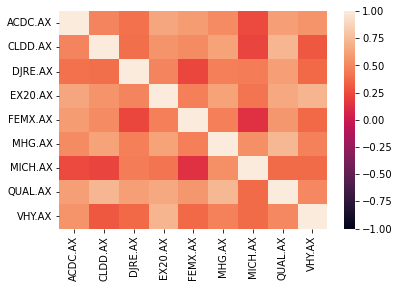

In [36]:
sns.heatmap(growcorrelation, vmin=-1, vmax=1) #.get_figure().savefig("MC_summitbal_sim_plot.png", bbox_inches="tight")
#plt.savefig("sample.png") 

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabe

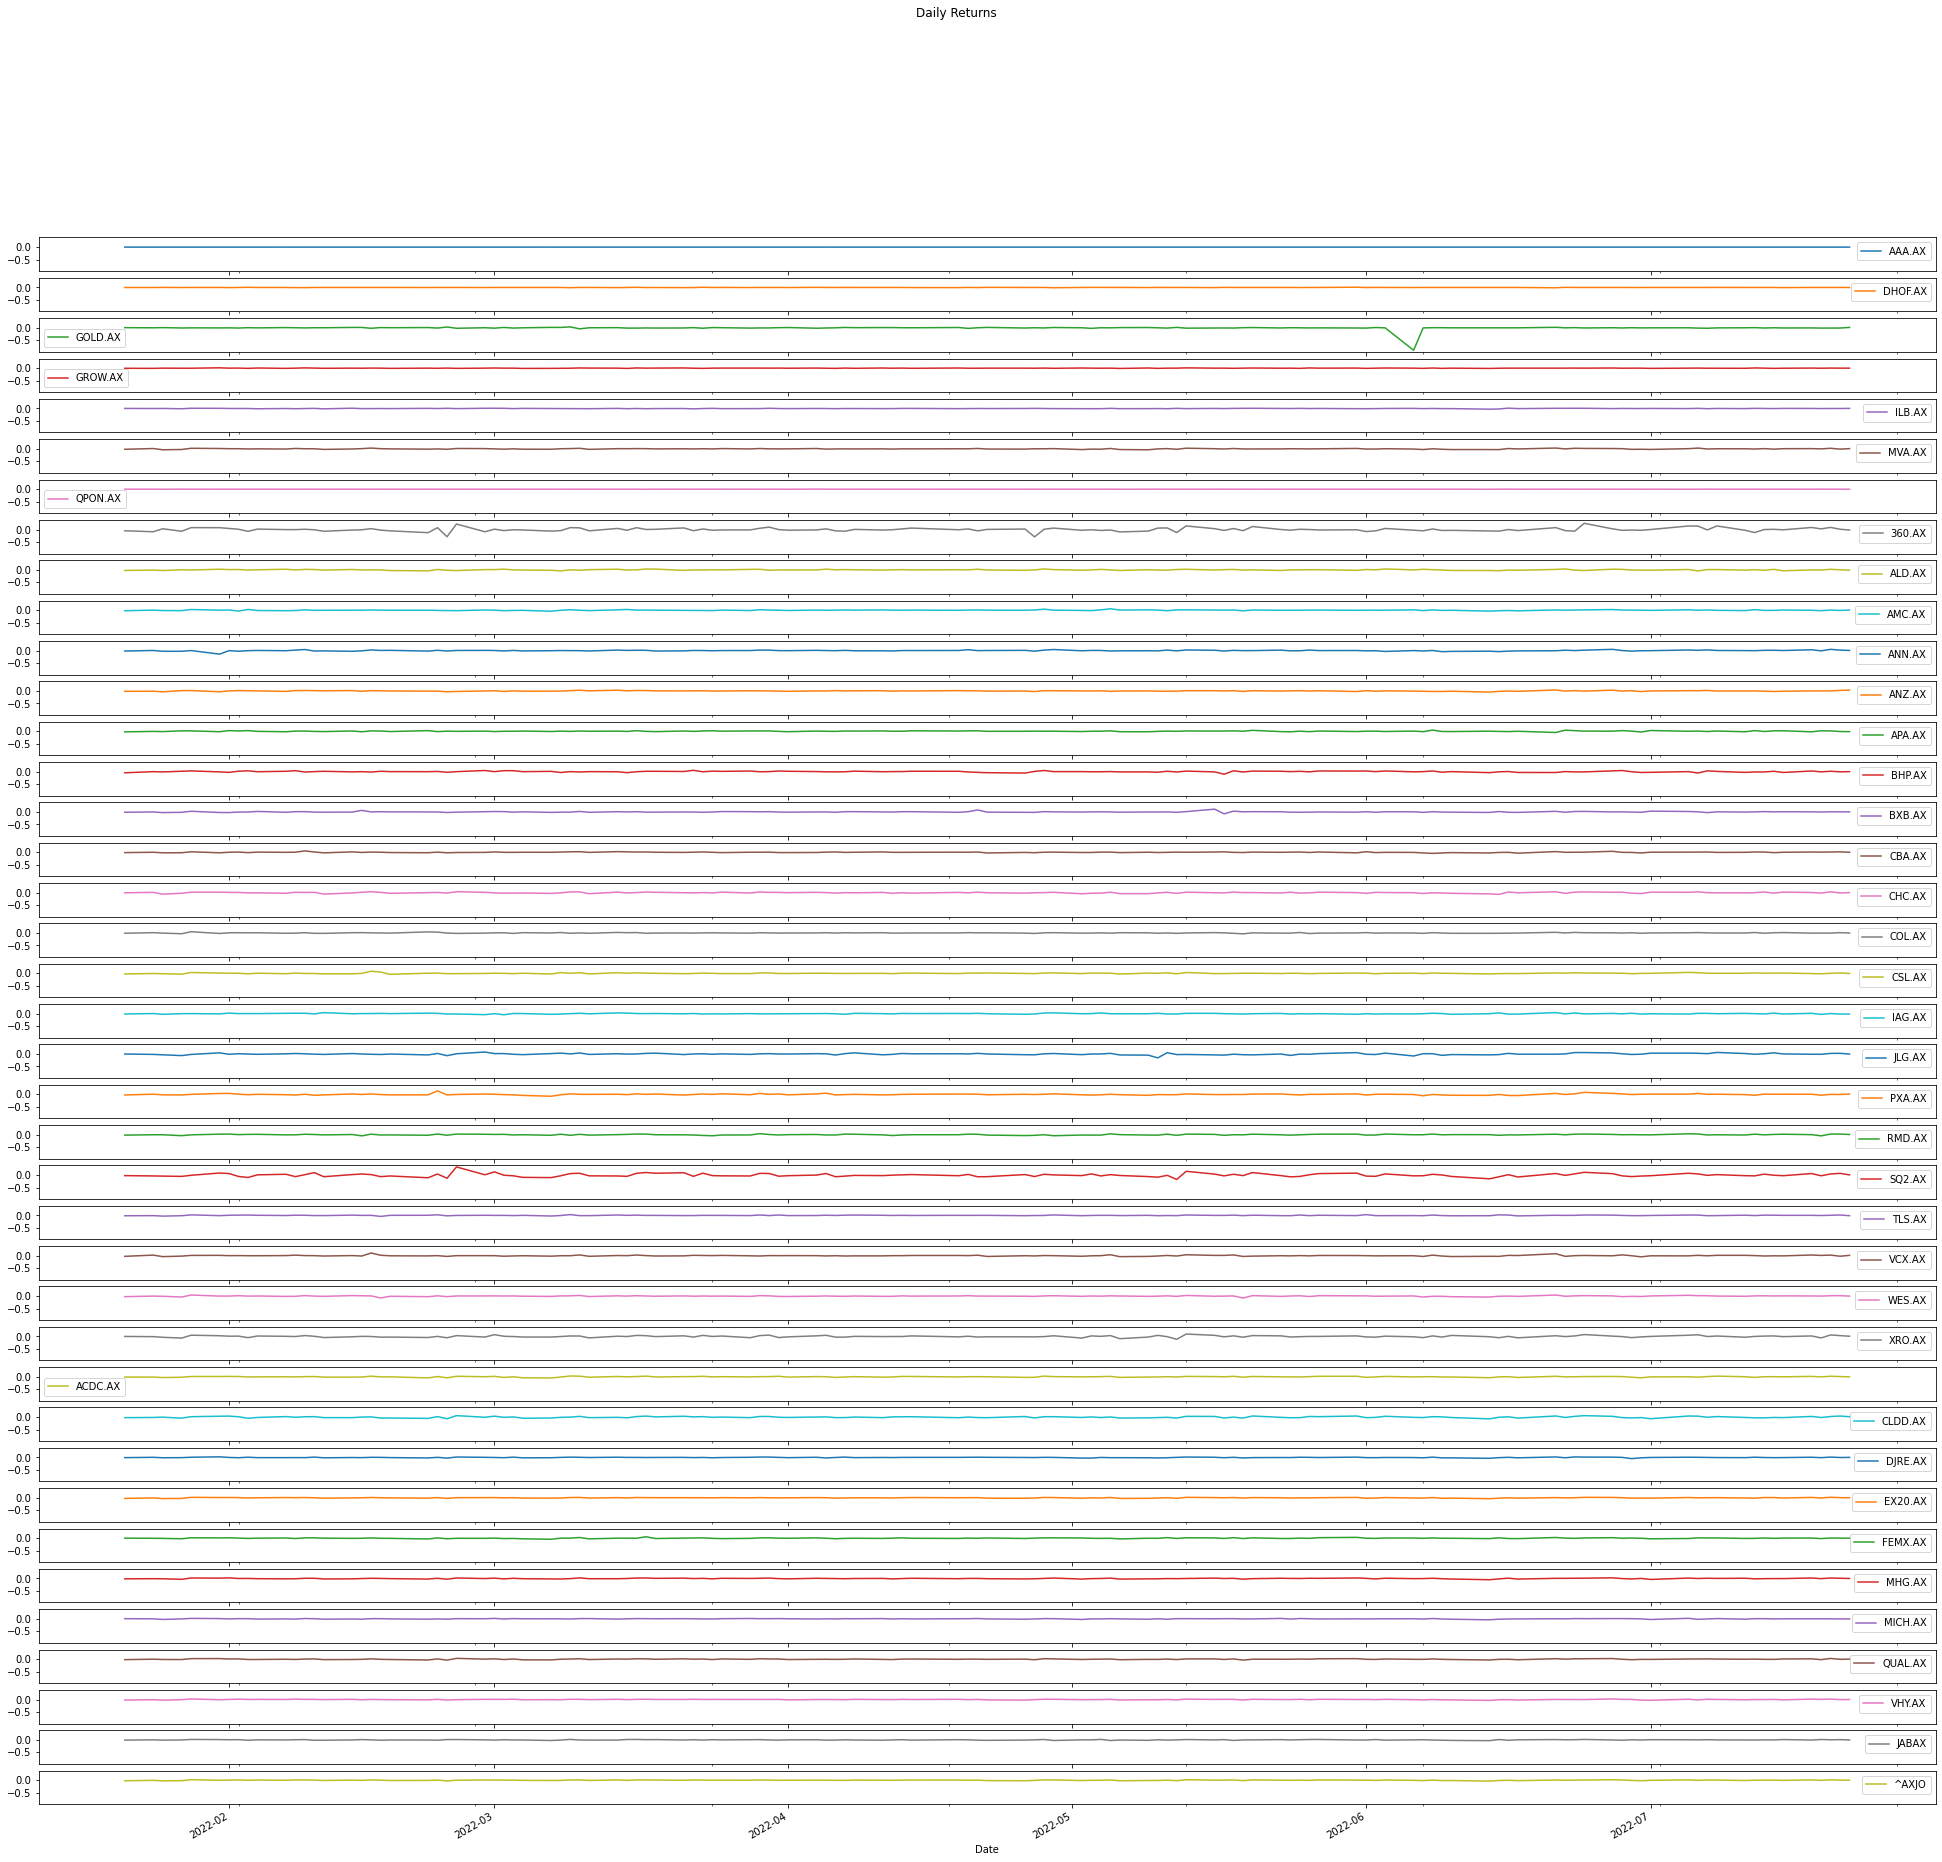

In [37]:
datareturns_df.plot(subplots=True,figsize=(34, 32), title="Daily Returns", sharey=True)

#graph individually,for loop graphing each column

In [38]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + datareturns_df).cumprod()

<AxesSubplot:title={'center':'Cumulative Daily Returns Summit Balanced'}, xlabel='Date'>

<Figure size 2520x1800 with 0 Axes>

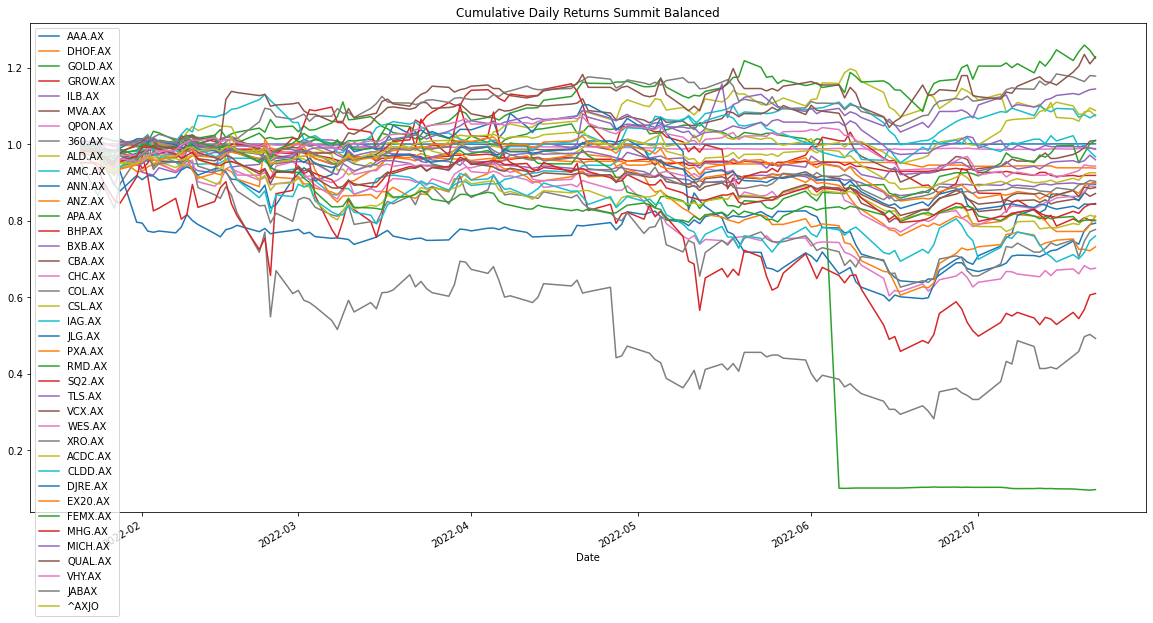

In [39]:
# Plot cumulative returns
from matplotlib.pyplot import figure

figure(figsize=(35, 25))
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Daily Returns Summit Balanced")

In [40]:
datareturns_df.head(10)


,AAA.AX,DHOF.AX,GOLD.AX,GROW.AX,ILB.AX,MVA.AX,QPON.AX,360.AX,ALD.AX,AMC.AX,...,CLDD.AX,DJRE.AX,EX20.AX,FEMX.AX,MHG.AX,MICH.AX,QUAL.AX,VHY.AX,JABAX,^AXJO
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21,0.0000,-0.001296,0.006419,-0.005277,0.003051,-0.017558,0.000387,-0.049238,-0.023415,-0.021574,...,-0.021970,-0.006658,-0.023245,0.000000,-0.013298,0.006757,-0.018116,-0.022491,-0.009432,-0.022690
2022-01-24,0.0000,-0.002202,0.000713,-0.007958,-0.001141,0.012053,0.000387,-0.088779,-0.007659,0.003576,...,-0.013943,0.005865,-0.005949,-0.005650,-0.008086,0.000000,-0.000984,-0.007875,0.001626,-0.005059
2022-01-25,0.0000,0.001834,0.008554,0.000000,0.001446,-0.037372,-0.001934,0.031123,-0.026510,-0.013658,...,-0.002357,-0.011662,-0.031421,-0.009943,-0.010870,-0.023490,-0.012066,-0.024903,-0.010434,-0.024918
2022-01-27,0.0002,-0.002012,-0.007192,-0.002674,-0.009807,-0.026024,0.001937,-0.068241,0.003447,-0.016255,...,-0.040945,-0.007164,-0.024202,-0.024390,-0.032967,-0.003436,-0.014207,-0.006385,-0.002812,-0.017711
2022-01-28,-0.0002,0.000000,-0.001591,-0.002681,0.009367,0.022339,0.000000,0.076056,-0.005496,0.028764,...,0.017241,0.008913,0.018470,0.014706,0.019886,0.017241,0.021997,0.023775,0.017387,0.021906
2022-01-31,0.0002,0.000000,-0.003733,0.013441,0.006770,0.013710,-0.000773,0.073298,0.026943,0.000595,...,0.035512,0.024821,0.011399,0.010145,0.013928,0.010169,0.023998,-0.007532,0.011778,-0.002361
2022-02-01,-0.0002,-0.006048,-0.001726,0.000000,0.001058,0.005072,-0.001161,0.042683,0.010763,0.008323,...,0.040530,0.000411,0.012295,0.014347,0.024725,-0.003356,0.007973,0.004427,0.004793,0.004934
2022-02-02,-0.0002,0.000000,-0.009995,0.002653,-0.000755,0.005467,0.000387,0.011696,0.014975,-0.035377,...,0.013483,-0.010669,0.007085,0.001414,0.000000,0.006734,0.011026,0.014009,0.009087,0.011661


In [41]:
# Set weights
weights = [0.025, 0.172, 0.05, 0.028, 0.07, 0.085, 0.07, 0.0074, 0.0074, .0147, 0.0058, 0.0134, 0.0055, 0.0184, 0.0077, 0.0178, 0.0147, 0.0092, 0.0166, 0.0052, 0.0111, 0.0058, 0.0074, 0.0093, 0.0074, 0.0058, 0.011, 0.0058, 0.0208, 0.0192, 0.025, 0.023, 0.0520, 0.0613, 0.03, 0.0613, 0.00, 0.00, 0.00]

In [42]:
#Here I need to have a table of the top 5 holdings by size, ie extract the weights for the 5 largest holdings. #weights as its own column call it weights, sortby function Ascending = False pivot table 

In [43]:
# Use the `dot` function to sum the product each weight and the corresponding stock daily return.
summitbal_returns = datareturns_df.dot(weights)
# Rename `Close` Column to be specific to this portfolio.
summitbal_returns.tail(30)

Date
2022-06-08    0.004942
2022-06-09   -0.007196
2022-06-10   -0.009919
2022-06-14   -0.023242
2022-06-15   -0.010130
2022-06-16    0.001997
2022-06-17   -0.011220
2022-06-21    0.011377
2022-06-22    0.000559
2022-06-23    0.008171
2022-06-24    0.012034
2022-06-27    0.011753
2022-06-28    0.000888
2022-06-29   -0.008368
2022-06-30   -0.008438
2022-07-01   -0.008749
2022-07-05    0.007714
2022-07-06    0.006569
2022-07-07    0.000971
2022-07-08    0.004667
2022-07-11   -0.003016
2022-07-12   -0.002002
2022-07-13    0.000349
2022-07-14   -0.002000
2022-07-15   -0.001044
2022-07-18    0.006424
2022-07-19   -0.006348
2022-07-20    0.010428
2022-07-21    0.001996
2022-07-22    0.002229
dtype: float64

<AxesSubplot:title={'center':'Rolling Std Dev Summit Balanced'}, xlabel='Date'>

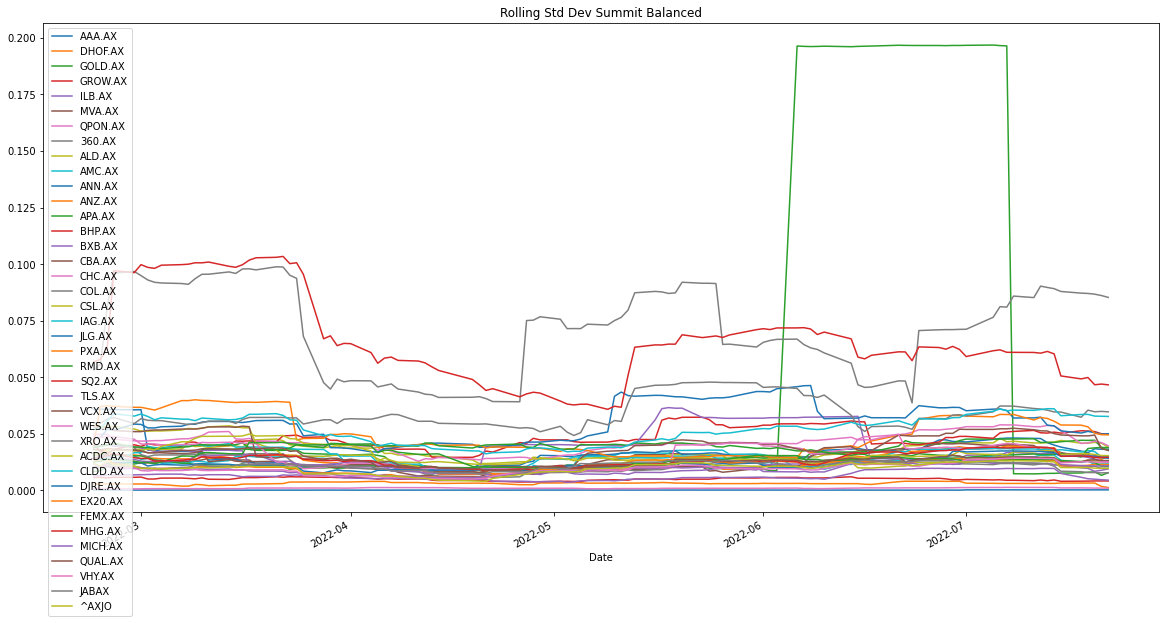

In [44]:
# Calculate rolling standard deviation
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rollingsummitbal_std = datareturns_df.rolling(window=21).std()


# Plot the rolling standard deviation
rollingsummitbal_std.plot(figsize=(20, 10), title="Rolling Std Dev Summit Balanced")
# Plot rolling standard deviation

In [45]:
#dateoffsets run something today and then offset for 1 week, 1 month from the day ie 90 days, and you may have to adjust it may be financial datetime calcs ie quarters images run on a monday first step is getting the saved images and put them into a pdf

In [46]:
#another option would be to run the programs and convert them to a pdf create a REST API for clients give clients up to date and possibly subscription service 

In [47]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-06-15', tz='Australia/Sydney').isoformat()
end_date = pd.Timestamp('2022-06-03', tz='Australia/Sydney').isoformat()

In [48]:
weights1 = [0.025, 0.07, 0.088, 0.1, 0.102, 0.11, 0.0074, 0.0074, .0147, 0.0058, 0.0134, 0.0055, 0.0184, 0.0077, 0.0178, 0.0147, 0.0092, 0.0166, 0.0102, 0.0119, 0.0074, 0.0074, 0.0151, 0.011, 0.0058, 0.0208, 0.105, 0.0342, 0.0520, 0.0613, 0.03, 0.0613, 0.00]




    

In [49]:
weightsgrow = [.010, .058, .0312, .03, .034, .028, .0118, .0118, .0236, .0092, .0214, .0088, .0294, .0124, .0284, .0236, .0147, .0265, .0102, .0192, .0638, .0166, .0142, .0226, .0092, .0333, .0517, .0518, .0840, .098, .048, .098, .00]

In [50]:
weightsbg = [.015, .06,  .07, .052, .061, .042, .0103, .0103, .0206, .0081, .0188, .0077, .0257, .0108, .0249, .0206, .0129, .0232, .0072, .0181, .0158, .0153, .0144, .0154, .0081, .0306, .0450, .0402, .0824, .0858, .042, .0858, .00]

In [51]:
weightsmod = [.035, .10, .0392, .198, .1798, .148, .0044, .0044, .0088, .0035, .008, .0033, .0110, .0046, .0107, .0088, .0055, .0099, .0156, .0191, .02, .0062, .0063, .0066, .0035, .0125, .0210, .0183, .0315, .0368, .018, .0368, .00]

In [52]:
# Get 5 years' worth of historical data for all of the holdings
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# This is the new coding based on the need to concatentate the AGG and SPY data since it was producing the rows of the Indexes whereas we want it in the format that the MC Simulation can run 
portfolio1_df = pd.concat([defport1, shareport1, growport1], axis = "columns", join = "inner")



# Display sample data
portfolio1_df

Adj Close                                                        \
               AAA.AX     GOLD.AX GROW.AX      ILB.AX     MVA.AX    QPON.AX   
Date                                                                          
2019-05-10  50.090000  173.250000    3.69  123.769997  23.670000  25.680000   
2019-05-13  50.099998  173.279999    3.67  123.550003  23.959999  25.680000   
2019-05-14  50.099998  175.740005    3.68  124.190002  23.920000  25.690001   
2019-05-15  50.099998  176.009995    3.67  123.980003  23.879999  25.680000   
2019-05-16  50.115002  176.410004    3.67  124.760002  24.110001  25.660000   
...               ...         ...     ...         ...        ...        ...   
2022-07-18  50.099998   23.480000    3.48  117.800003  20.959999  25.500000   
2022-07-19  50.099998   23.200001    3.47  117.480003  20.930000  25.540001   
2022-07-20  50.110001   22.980000    3.48  117.489998  21.400000  25.549999   
2022-07-21  50.099998   22.760000    3.48  117.489998  21.150000  25.559999   
2022-07-22  50.099998   23.110001    3.48  118.080002  21.330000  25.540001   

                Close                                  ...       Open  \
               AAA.AX     GOLD.AX GROW.AX      ILB.AX  ...    QUAL.AX   
Date                                                   ...              
2019-05-10  50.090000  173.250000    3.69  123.769997  ...  26.620001   
2019-05-13  50.099998  173.279999    3.67  123.550003  ...  26.480000   
2019-05-14  50.099998  175.740005    3.68  124.190002  ...  26.090000   
2019-05-15  50.099998  176.009995    3.67  123.980003  ...  26.450001   
2019-05-16  50.115002  176.410004    3.67  124.760002  ...  26.639999   
...               ...         ...     ...         ...  ...        ...   
2022-07-18  50.099998   23.480000    3.48  117.800003  ...  36.330002   
2022-07-19  50.099998   23.200001    3.47  117.480003  ...  36.099998   
2022-07-20  50.110001   22.980000    3.48  117.489998  ...  36.070000   
2022-07-21  50.099998   22.760000    3.48  117.489998  ...  36.590000   
2022-07-22  50.099998   23.110001    3.48  118.080002  ...  37.180000   

                       Volume                                                  \
               VHY.AX ACDC.AX DJRE.AX EX20.AX FEMX.AX  MHG.AX MICH.AX QUAL.AX   
Date                                                                            
2019-05-10  58.549999     143   26651   16203   16305   11773  201063   42834   
2019-05-13  58.840000    1491   14391    2372   16495    6331  317454   21644   
2019-05-14  58.389999     121   17043    6715   33945   17510  166030   59189   
2019-05-15  58.610001       0   28897   11015   10394   64518  282788   31777   
2019-05-16  58.849998    2145   15676       0    6644      10  158569   21596   
...               ...     ...     ...     ...     ...     ...     ...     ...   
2022-07-18  61.290001    6301   27897    6081   47310   44961  155099  637226   
2022-07-19  61.889999    4508   11803    4795   33977   71034  232327   94778   
2022-07-20  62.080002    6168   16797   12540   33755  161933  392512  133293   
2022-07-21  62.650002   13666   11975   13713   31511   62099  285447   99118   
2022-07-22  62.450001    9245   12423   10683   51377  224571  188040  104741   

                   
           VHY.AX  
Date               
2019-05-10  18928  
2019-05-13  19924  
2019-05-14  33388  
2019-05-15  16941  
2019-05-16  25115  
...           ...  
2022-07-18  39001  
2022-07-19  38559  
2022-07-20  73301  
2022-07-21  77927  
2022-07-22  73988  

[813 rows x 198 columns]

In [53]:
#defport
portfolio1_df.columns = portfolio1_df.columns.swaplevel(0, 1)
portfolio1_df.sort_index(axis=1, level=0, inplace=True)
portfolio1_df = portfolio1_df.rename(columns = {'Close' : 'close'})

In [54]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

from MCForecastTools import MCSimulation

In [55]:
#?MCSimulation

In [56]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_summitbal = MCSimulation(
    portfolio_data = portfolio1_df,
    weights = weights1,
    
    num_simulation = 300,
    num_trading_days = 252*30
)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jimp\Homework1\PossibleAPI\PossibleAPI\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


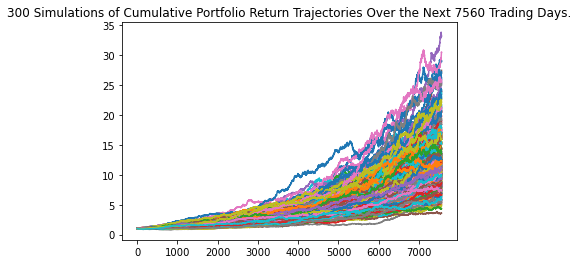

In [57]:
# Plot simulation outcomes
line_plot = MC_summitbal.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_summitbal_sim_plot.png", bbox_inches="tight")

In [ ]:
#Running a Monte Carlo simulation to forecast thirty years cumulative returns
MC_summitbal.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jimp\Homework1\PossibleAPI\PossibleAPI\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997113,1.001102,1.005986,1.003644,0.997465,0.997172,1.000373,0.999043,0.998165,1.008038,...,1.003192,1.004046,1.000044,1.000059,1.002259,1.001900,1.002299,0.995212,1.005582,0.998315
2,1.003846,1.004874,1.008857,1.000670,1.001683,1.001085,0.998488,1.006579,0.999230,1.012420,...,1.002129,1.000929,1.007969,0.994335,1.000484,0.999106,1.004870,1.002023,1.009117,1.002002
3,1.001931,1.002661,1.003839,1.000583,0.996372,1.001613,1.001677,1.014236,0.994316,1.009641,...,1.008435,1.003252,1.004449,1.001955,1.000178,0.995299,0.999226,1.006115,1.004865,0.992296
4,1.000757,1.000014,1.004373,1.006169,0.987195,1.002032,0.991962,1.018256,0.988891,1.008981,...,1.006209,1.012953,0.996344,1.005857,1.004261,0.994176,0.997966,1.001663,1.000126,0.995604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.404830,8.758733,20.257376,16.842789,7.375425,16.247051,7.788274,11.029112,9.866663,12.713911,...,9.262872,20.826527,19.257751,9.437789,14.234729,11.118310,10.622871,14.250949,4.248817,8.913897
7557,10.332719,8.794164,20.024847,16.848066,7.354049,16.247281,7.810647,11.054788,9.948303,12.789524,...,9.210964,20.853734,19.244339,9.474705,14.227564,11.128187,10.585019,14.351193,4.279548,8.869262
7558,10.300192,8.801393,19.986664,16.784123,7.388348,16.260714,7.781233,11.127764,9.904181,12.792446,...,9.197649,20.953673,19.154805,9.418154,14.191927,11.145617,10.641488,14.314239,4.245016,8.906669
7559,10.352566,8.786698,19.953366,16.742489,7.376141,16.211516,7.791076,11.176863,9.885507,12.841823,...,9.184789,21.091941,19.222898,9.377398,14.115628,11.063915,10.594625,14.276611,4.259275,8.908916


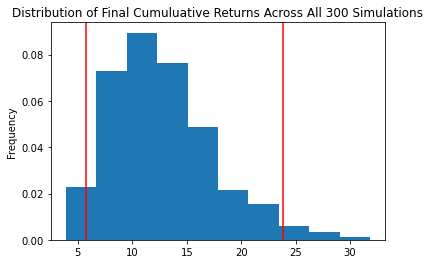

In [ ]:
# Plot probability distribution and confidence intervals

dist_plot = MC_summitbal.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_summitbal_dist_plot.png',bbox_inches='tight')

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_summitbal.summarize_cumulative_return()

# Print summary statistics

print(tbl)

count           300.000000
mean             12.714520
std               4.756350
min               3.893772
25%               9.313354
50%              12.200719
75%              15.223016
max              31.838708
95% CI Lower      5.775494
95% CI Upper     23.812231
Name: 7560, dtype: float64


In [ ]:
# Set initial investment
init_investment = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*25000,2)
ci_upper = round(tbl[9]*25000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${init_investment} in the Summit balanced"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $25000 in the Summit balanced over the next 30 years will end within the range of $144387.35 and $595305.77


In [70]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_summitgrow = MCSimulation(
    portfolio_data = portfolio1_df,
    weights = weightsgrow,
    
    num_simulation = 300,
    num_trading_days = 252*30
)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jimp\Homework1\PossibleAPI\PossibleAPI\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


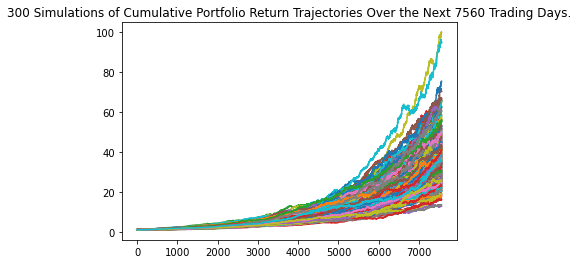

In [57]:
# Plot simulation outcomes
line_plotgrow = MC_summitgrow.plot_simulation()

# Save the plot for future usage
line_plotgrow.get_figure().savefig("MC_summitgrow_sim_plot.png", bbox_inches="tight")

In [58]:
#Running a Monte Carlo simulation to forecast thirty years cumulative returns
MC_summitgrow.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jimp\Homework1\PossibleAPI\PossibleAPI\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993804,0.997326,1.002429,1.002796,1.000786,0.995932,0.996749,0.993473,1.000748,1.005447,...,1.001293,1.004331,1.002070,1.003428,1.001127,0.995916,0.999435,0.997716,0.994686,0.998518
2,0.995227,1.002455,0.999689,1.000564,0.999711,0.991072,0.995282,0.993840,1.001520,1.004783,...,0.999809,1.006161,0.992040,1.000672,1.006573,0.991034,0.997679,0.999739,0.996601,0.995615
3,0.995089,1.006361,1.009550,1.000895,0.991299,0.991732,1.003220,0.992370,0.995137,1.006267,...,0.998931,1.003391,0.990963,1.008631,1.006517,0.987332,1.006320,1.000526,0.999867,1.000568
4,0.993864,1.006577,1.005562,1.000157,0.994654,0.993018,1.003783,0.992486,0.987777,1.011147,...,0.996666,1.006611,0.986027,1.011541,1.004941,0.984398,1.010223,0.996498,1.006963,1.003309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,29.941824,48.804950,62.534605,22.381815,30.683462,49.591595,47.113455,21.830735,24.324894,19.908981,...,20.506012,31.009376,39.308859,59.540304,41.393233,27.668770,31.142258,23.788866,73.494535,44.115529
7557,29.686609,48.708442,62.485079,22.344306,30.669997,49.699739,47.030431,21.848346,24.423002,19.954176,...,20.574460,30.977998,39.536800,59.454803,41.308453,27.712794,31.062939,23.892979,73.814233,44.039795
7558,29.676581,48.613789,62.385518,22.311869,30.533322,49.785724,47.149408,21.912826,24.538925,19.768499,...,20.518295,31.078432,39.503881,59.601245,41.413289,27.646379,30.993582,23.824888,73.433466,44.050777
7559,29.771788,48.650525,62.825185,22.278090,30.452761,49.938129,47.146355,22.010544,24.734595,19.745928,...,20.438150,31.128925,39.371065,59.722851,41.483457,27.621728,31.179940,23.672803,73.672583,44.086048


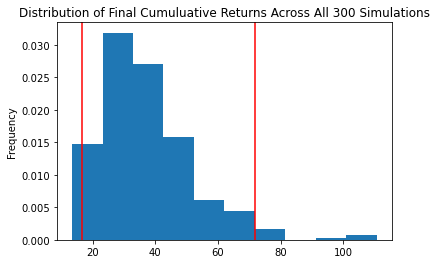

In [59]:
# Plot probability distribution and confidence intervals
dist_plotgrow = MC_summitgrow.plot_distribution()

# Save the plot for future usage
dist_plotgrow.get_figure().savefig('MC_summitgrow_dist_plot.png',bbox_inches='tight')

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
tblgrow = MC_summitgrow.summarize_cumulative_return()

# Print summary statistics

print(tblgrow)

count           300.000000
mean             36.905240
std              14.586280
min              13.398097
25%              27.225065
50%              34.436156
75%              43.949327
max             110.684328
95% CI Lower     16.595733
95% CI Upper     71.717956
Name: 7560, dtype: float64


In [61]:
# Set initial investment
init_investment = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tblgrow[8]*25000,2)
ci_upper = round(tblgrow[9]*25000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${init_investment} in the Summit growth"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $25000 in the Summit growth over the next 30 years will end within the range of $414893.33 and $1792948.89


In [62]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_summitbg = MCSimulation(
    portfolio_data = portfolio1_df,
    weights = weightsbg,
    
    num_simulation = 300,
    num_trading_days = 252*30
)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jimp\Homework1\PossibleAPI\PossibleAPI\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


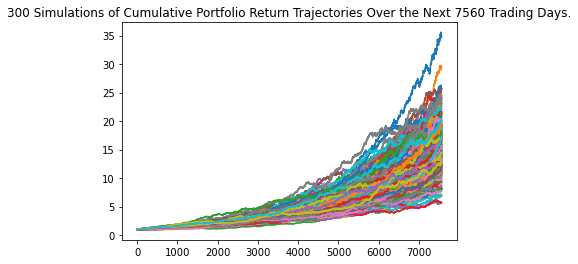

In [63]:
# Plot simulation outcomes
line_plotbg = MC_summitbg.plot_simulation()

# Save the plot for future usage
line_plotbg.get_figure().savefig("MC_summitbg_sim_plot.png", bbox_inches="tight")

In [64]:
#Running a Monte Carlo simulation to forecast thirty years cumulative returns
MC_summitbg.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jimp\Homework1\PossibleAPI\PossibleAPI\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003128,0.999552,1.000345,1.001973,0.999855,1.005792,1.002700,1.006157,1.004318,0.994572,...,0.996160,1.000796,1.004897,0.993617,1.002577,0.995446,0.998346,0.998819,1.005855,1.001381
2,1.004136,1.000543,0.999703,1.001953,1.001520,1.003277,1.003303,1.004134,1.002225,0.991061,...,0.991833,0.998985,1.003050,0.985407,1.004362,0.995386,0.991691,0.999793,1.009776,1.003783
3,1.005573,1.001922,0.999263,0.998435,1.002673,1.003742,1.004031,1.004430,0.994906,0.986534,...,0.990229,1.001085,0.993733,0.988815,1.000372,0.995053,0.980876,1.000797,1.014067,1.003613
4,1.007703,1.003664,0.996380,0.997445,1.004398,1.007282,1.003673,1.007871,0.995877,0.983595,...,0.997996,0.997744,0.994805,0.992476,1.004689,0.996157,0.983282,1.005298,1.010471,1.004865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.452315,10.193045,14.277762,16.440265,12.587421,17.439348,16.977251,23.428484,12.369796,14.480498,...,11.221634,18.826796,7.174695,14.117178,10.778779,14.517635,10.877764,16.643731,17.450941,7.601612
7557,11.466008,10.125717,14.361290,16.461152,12.501939,17.497023,16.947590,23.454587,12.333077,14.649227,...,11.193759,19.006479,7.135092,14.048053,10.769096,14.509854,10.893237,16.679102,17.472875,7.645780
7558,11.487108,10.118124,14.346652,16.572678,12.476595,17.491491,16.977540,23.434314,12.346190,14.654595,...,11.245993,18.991639,7.117232,14.022936,10.704330,14.583762,10.929120,16.509625,17.466735,7.663305
7559,11.490709,10.167722,14.317956,16.631174,12.470515,17.465189,16.937292,23.457498,12.331042,14.683558,...,11.249611,18.990473,7.137407,14.057632,10.742072,14.523420,10.887462,16.480960,17.636817,7.632116


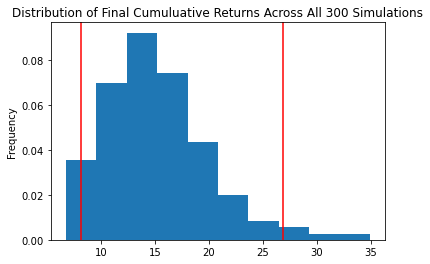

In [65]:
# Plot probability distribution and confidence intervals
dist_plotbg = MC_summitbg.plot_distribution()

# Save the plot for future usage
dist_plotbg.get_figure().savefig('MC_summitbg_dist_plot.png',bbox_inches='tight')

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
tblbg = MC_summitbg.summarize_cumulative_return()

# Print summary statistics

print(tblbg)

count           300.000000
mean             15.265831
std               4.737871
min               6.732423
25%              11.981888
50%              14.685467
75%              17.859008
max              34.921074
95% CI Lower      8.154496
95% CI Upper     26.814937
Name: 7560, dtype: float64


In [67]:
# Set initial investment
init_investment = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tblbg[8]*25000,2)
ci_upper = round(tblbg[9]*25000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${init_investment} in the balanced growth"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $25000 in the balanced growth over the next 30 years will end within the range of $203862.41 and $670373.42


In [68]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_summitmod = MCSimulation(
    portfolio_data = portfolio1_df,
    weights = weightsmod,
    
    num_simulation = 300,
    num_trading_days = 252*30
)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jimp\Homework1\PossibleAPI\PossibleAPI\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


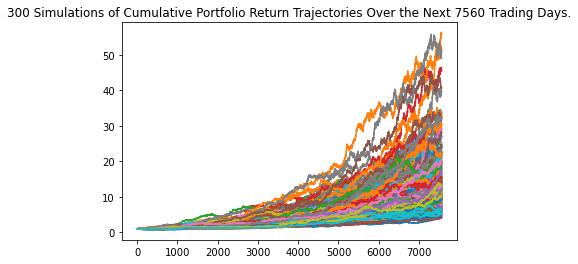

In [69]:
# Plot simulation outcomes
line_plotmod = MC_summitmod.plot_simulation()

# Save the plot for future usage
line_plotmod.get_figure().savefig("MC_summitmod_sim_plot.png", bbox_inches="tight")

In [70]:
#Running a Monte Carlo simulation to forecast thirty years cumulative returns
MC_summitmod.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jimp\Homework1\PossibleAPI\PossibleAPI\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995495,1.003383,1.001485,1.001083,1.001971,1.005119,1.016192,1.001337,0.996116,0.996619,...,1.003031,0.999076,1.005617,0.987227,1.000104,1.011587,0.997065,1.008756,0.992489,1.002208
2,0.999980,0.998889,0.995010,1.001733,0.994183,1.017145,1.018781,1.014814,0.992044,0.988614,...,1.013901,0.986791,1.001673,0.977811,0.987620,1.009437,0.995593,0.995717,1.000747,1.000298
3,0.993508,1.004334,1.005609,1.005194,0.990446,1.016971,1.033207,1.009826,0.991422,0.990661,...,1.010399,0.983975,0.990378,0.978865,0.987795,1.002369,0.993536,0.994577,1.004047,0.999956
4,0.993030,1.011173,1.005887,1.009383,0.982564,1.023660,1.037081,1.000974,0.998790,0.994346,...,1.010062,0.979439,0.991250,0.988096,0.976579,0.997293,0.996069,0.994713,1.009710,0.997405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.286011,17.388083,29.134726,10.560511,8.324092,15.223194,10.898805,30.942089,11.155845,8.947665,...,25.695603,11.816317,3.245447,11.957891,4.052412,14.181643,18.654918,27.431652,12.866722,22.959569
7557,11.121223,17.469738,29.016797,10.540365,8.336294,15.278295,10.840228,31.169825,11.183569,8.997192,...,25.767530,11.760941,3.232705,12.012062,4.092299,14.345700,18.678881,27.365814,12.970868,22.890595
7558,11.200985,17.250003,28.936963,10.512715,8.418537,15.251079,10.921621,31.429101,11.025470,8.933980,...,25.734657,11.824843,3.219440,12.140961,4.067470,14.399717,18.746567,27.173358,13.121129,22.988236
7559,11.204659,17.324065,28.972208,10.496796,8.369340,15.237737,10.970870,31.550194,11.052318,8.925385,...,25.838410,11.786453,3.202757,12.201808,4.075017,14.503863,18.624122,27.191837,13.050190,22.855468


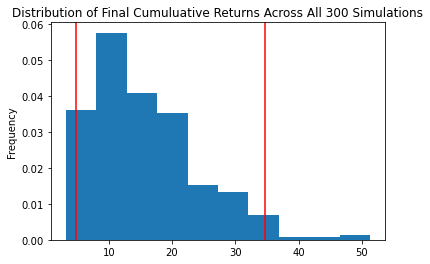

In [71]:
# Plot probability distribution and confidence intervals
dist_plotmod = MC_summitmod.plot_distribution()

# Save the plot for future usage
dist_plotmod.get_figure().savefig('MC_summitmod_dist_plot.png',bbox_inches='tight')

In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
tblmod = MC_summitmod.summarize_cumulative_return()

# Print summary statistics

print(tblmod)

count           300.000000
mean             15.667768
std               8.310287
min               3.199819
25%               9.609215
50%              13.372155
75%              20.048145
max              51.312630
95% CI Lower      4.889353
95% CI Upper     34.644094
Name: 7560, dtype: float64


In [73]:
# Set initial investment
init_investment = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tblmod[8]*25000,2)
ci_upper = round(tblmod[9]*25000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${init_investment} in the Moderate portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $25000 in the Moderate portfolio over the next 30 years will end within the range of $122233.83 and $866102.35


In [89]:
quote_table = yf.get_quote_table("CBA.AX", "RMD.AX", dict_result=False)
quote_table

AttributeError: module 'yfinance' has no attribute 'get_quote_table'

In [ ]:
yf.get_stats_valuation("CBA.AX, RMD.AX")